## Importing Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

## Loading and overviewing the data 

In [121]:
# Load the dataset
data = pd.read_csv('WineQT.csv')

# Setting 'Id' as index
data = data.set_index('Id')


In [122]:

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1129 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB
None

First 5 Rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [123]:
# Basic statistical summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1129.000000   
mean        8.311111          0.531339     0.268364        2.536758   
std         1.747595          0.179633     0.196686        1.358636   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000        

## Exploratory Data Analysis

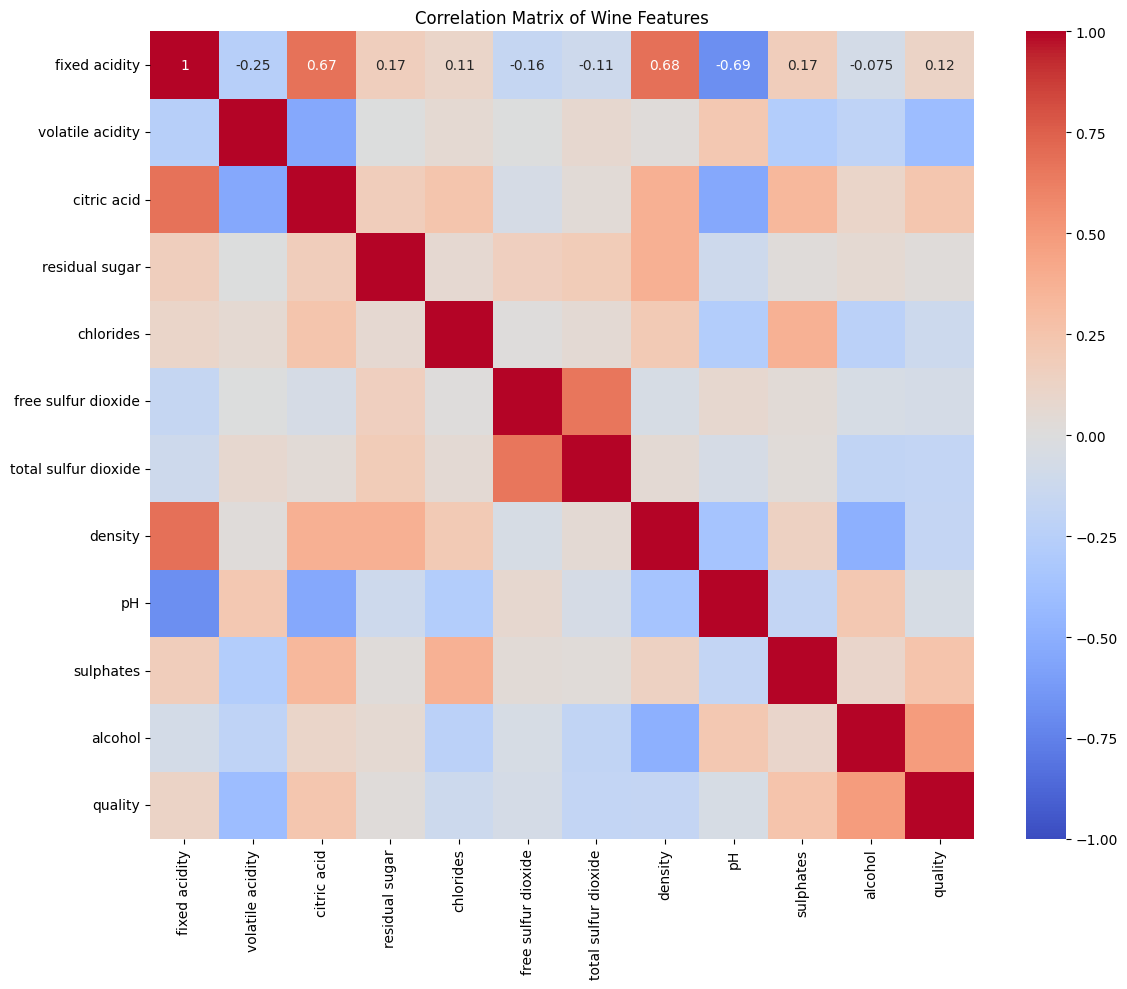

In [124]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

In [125]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar          14
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64


In [126]:
# Fill NA values with the mean of each column
data = data.fillna(data.mean())

In [127]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [128]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 124


In [129]:
# Remove duplicate rows
df_no_duplicates = data.drop_duplicates()

# Display the number of rows removed
rows_removed = len(data) - len(df_no_duplicates)
print(f"Number of duplicate rows removed: {rows_removed}")

Number of duplicate rows removed: 124


## Feature Scaling


Feature Ranges and Distribution:
fixed acidity: Min = 4.6, Max = 15.9
volatile acidity: Min = 0.12, Max = 1.58
citric acid: Min = 0.0, Max = 1.0
residual sugar: Min = 0.9, Max = 15.5
chlorides: Min = 0.012, Max = 0.611
free sulfur dioxide: Min = 1.0, Max = 68.0
total sulfur dioxide: Min = 6.0, Max = 289.0
density: Min = 0.99007, Max = 1.00369
pH: Min = 2.74, Max = 4.01
sulphates: Min = 0.33, Max = 2.0
alcohol: Min = 8.4, Max = 14.9
quality: Min = 3, Max = 8


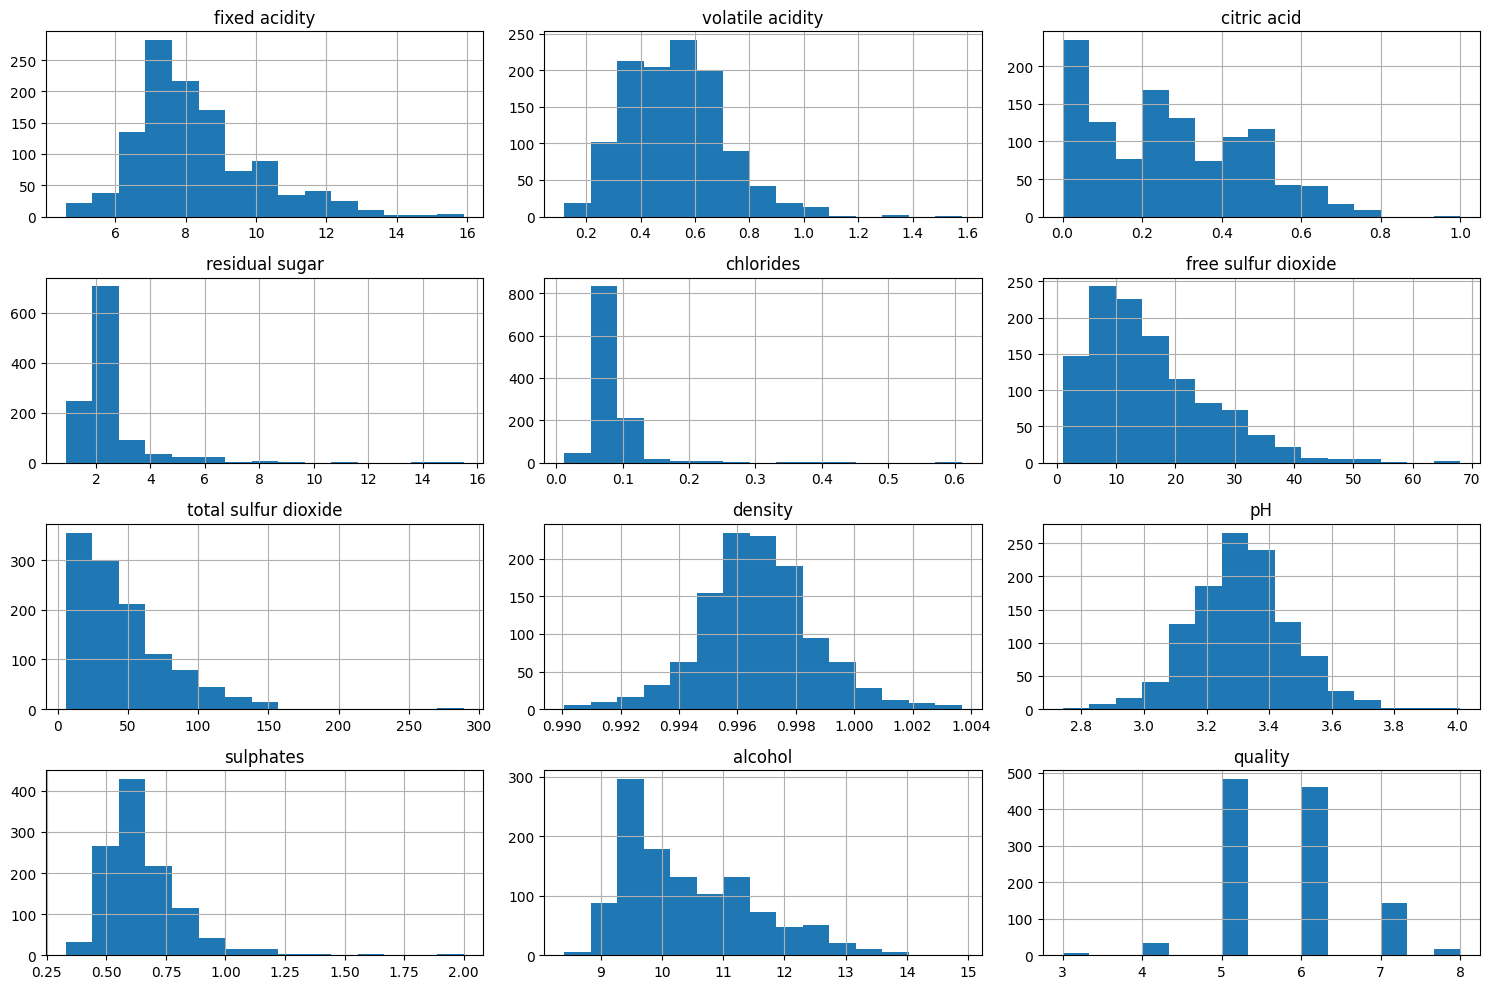


Scaled Data Sample:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.471781  -0.231395   
1      -0.292593          1.941813    -1.365027        0.046857   0.234247   
2      -0.292593          1.273492    -1.161568       -0.175417   0.107253   
3       1.653789         -1.399789     1.483400       -0.471781  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.471781  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol  quality  
0 -0.963382 

In [130]:
# Check range and distribution of each feature
print("\nFeature Ranges and Distribution:")
for column in data.columns:
    if data[column].dtype != 'object':  # Ignore non-numeric features if any
        print(f"{column}: Min = {data[column].min()}, Max = {data[column].max()}")

# Plot the distribution of features to visualize scaling needs
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Standardize the features if they are on different scales
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numeric_features]), columns=numeric_features)

# Add target column back if it's in the numeric features
if 'quality' in data.columns:  # Assuming 'quality' is the target
    scaled_data['quality'] = data['quality']

print("\nScaled Data Sample:")
print(scaled_data.head())

## Handling Class Imbalance for the Target Variable


Class Distribution (Quality):
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


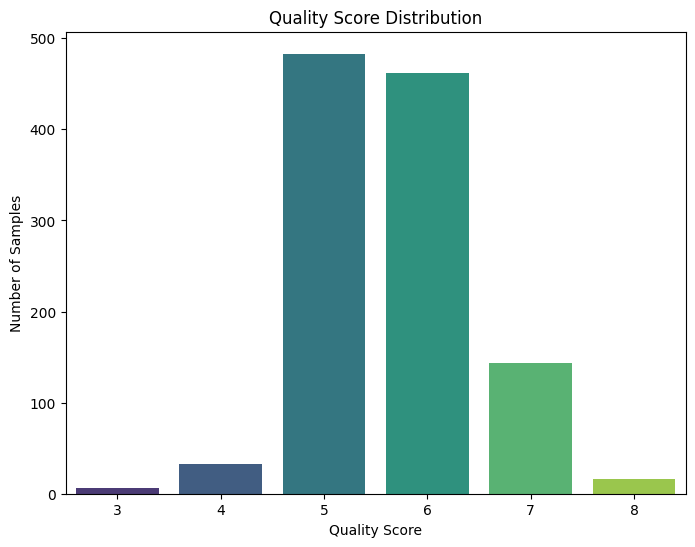


Class Imbalance Ratio (max/min): 80.50

Class imbalance detected.


In [131]:
# Check the distribution of the target variable (quality)
if 'quality' in data.columns:
    quality_distribution = data['quality'].value_counts()
    print("\nClass Distribution (Quality):")
    print(quality_distribution)

    # Plot the distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=quality_distribution.index, y=quality_distribution.values, palette='viridis')
    plt.title('Quality Score Distribution')
    plt.xlabel('Quality Score')
    plt.ylabel('Number of Samples')
    plt.show()

    # Check the class imbalance ratio
    imbalance_ratio = quality_distribution.max() / quality_distribution.min()
    print(f"\nClass Imbalance Ratio (max/min): {imbalance_ratio:.2f}")

    # Determine if class balancing is needed
    if imbalance_ratio > 2.0:  # Threshold for significant imbalance
        print("\nClass imbalance detected.")
    else:
        print("\nClass distribution is balanced.")

## Train-Test Split = 80:20

In [132]:
# Separate predictors and target
X = scaled_data.drop(columns=['quality'], axis=1)
y = data['quality']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Reduction using Prinple Component Analysis

Text(0.5, 1.0, 'Explained Variance Ratio vs. Number of Components')

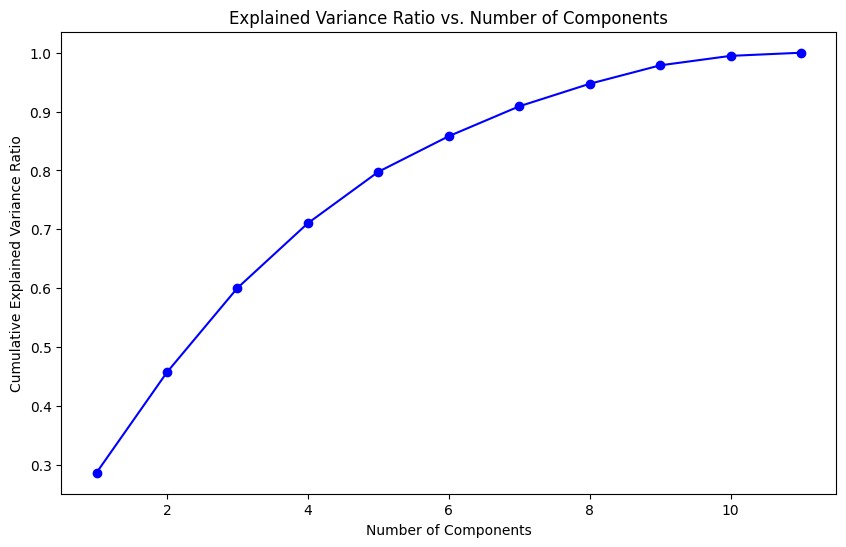

In [133]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')

In [134]:
# Select the number of components that explain 90% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"Number of components selected: {n_components}")

Number of components selected: 7


In [135]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Regression Models 

### 1. Linear Regression

In [136]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train)

# Predictions and evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test_pca)
print("\nLinear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_linear):.2f}")


Linear Regression:
Mean Squared Error: 0.40
R^2 Score: 0.39


### 2. Random Forest Regressor

In [137]:
# Random Forest Regressor Model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_pca, y_train)

# Predictions and evaluation for Random Forest Regressor
y_pred_rf = rf_regressor.predict(X_test_pca)
print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.2f}")


Random Forest Regressor:
Mean Squared Error: 0.36
R^2 Score: 0.44


### Bin the quality scores into categories 

In [138]:
bins = [0, 4, 6, 10]  # Define bins for low, medium, high quality
labels = ['low', 'medium', 'high']
y_binned = pd.cut(data['quality'], bins=bins, labels=labels)

# Update the target variable for classification
y_train_cls, y_test_cls = train_test_split(y_binned, test_size=0.2, random_state=42, stratify=y_binned)

## Classification Models
### 1. Logistic Regression

In [139]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_pca, y_train_cls)

# Predictions and evaluation for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test_pca)
print("\nLogistic Regression Classification:")
print(classification_report(y_test_cls, y_pred_logistic))
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_logistic):.2f}")


Logistic Regression Classification:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        32
         low       0.00      0.00      0.00         8
      medium       0.82      0.98      0.90       189

    accuracy                           0.81       229
   macro avg       0.27      0.33      0.30       229
weighted avg       0.68      0.81      0.74       229

Accuracy: 0.81


c:\Users\avika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\avika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\avika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### 2. Support Vector Machine

In [140]:
# Support Vector Machine Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_pca, y_train_cls)

# Predictions and evaluation for SVM
y_pred_svm = svm_model.predict(X_test_pca)
print("\nSupport Vector Machine Classification:")
print(classification_report(y_test_cls, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_svm):.2f}")



Support Vector Machine Classification:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        32
         low       0.00      0.00      0.00         8
      medium       0.82      0.99      0.90       189

    accuracy                           0.82       229
   macro avg       0.27      0.33      0.30       229
weighted avg       0.68      0.82      0.74       229

Accuracy: 0.82


c:\Users\avika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\avika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\avika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo